In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

# Try different values of support and confidence¶

In [3]:
# Load the dataset
data = pd.read_csv("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/9/my_movies.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
data.shape

(10, 15)

In [6]:
# Convert the data to a one-hot encoded format
data_encoded = pd.get_dummies(data)

In [7]:
# Apply the Apriori algorithm with different support and confidence values
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]


In [13]:
for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(data_encoded, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        
        # Print the number of rules for each combination of support and confidence
        print(f"Support={support}, Confidence={confidence}")
        print(f"Number of rules: {len(rules)}\n")

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support=0.1, Confidence=0.5
Number of rules: 63238



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support=0.1, Confidence=0.6
Number of rules: 56961



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support=0.1, Confidence=0.7
Number of rules: 56760

Support=0.2, Confidence=0.5
Number of rules: 647

Support=0.2, Confidence=0.6
Number of rules: 624

Support=0.2, Confidence=0.7
Number of rules: 423

Support=0.3, Confidence=0.5
Number of rules: 602

Support=0.3, Confidence=0.6
Number of rules: 579

Support=0.3, Confidence=0.7
Number of rules: 378



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/si

### pattern or trends from above

In [14]:
#As the support threshold decreases, the number of rules tends to increase. 
#As the confidence threshold increases, the number of rules tends to decrease. 

##### Overall, the choice of support and confidence thresholds can significantly impact the number of generated rules. A lower support threshold and a higher confidence threshold tend to result in a smaller set of more significant rules, whereas a higher support threshold and a lower confidence threshold lead to a larger set of rules, including weaker associations. 

# Change the minimum length in the Apriori algorithm:

In [15]:
# Change the minimum length in Apriori algorithm
min_length_values = [2, 3, 4]

In [20]:
# Define lists to store results
minimum_length_results = []
number_of_rules_results = []
average_support_results = []

In [21]:
for min_length in min_length_values:
    frequent_itemsets = apriori(data_encoded, min_support=0.2, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
    
    # Filter rules based on minimum length
    rules_filtered = rules[rules['antecedents'].apply(lambda x: len(x) >= min_length)]
    
    # Store results in lists
    minimum_length_results.append(min_length)
    number_of_rules_results.append(len(rules_filtered))
    average_support_results.append(rules_filtered['support'].mean())
    

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:

# Print the stored results
print("Results:")
for i in range(len(minimum_length_results)):
    print(f"Minimum Length={minimum_length_results[i]}")
    print(f"Number of rules: {number_of_rules_results[i]}")
    print(f"Average support: {average_support_results[i]}\n")

Results:
Minimum Length=2
Number of rules: 438
Average support: 0.39999999999999997

Minimum Length=3
Number of rules: 195
Average support: 0.4

Minimum Length=4
Number of rules: 51
Average support: 0.3999999999999999



In [25]:
#As the minimum length of the rules increases, the number of generated rules decreases. 
#Across different minimum lengths, the average support remains relatively consistent, ranging from approximately 0.4 to 0.4 (with slight variations due to floating-point precision).

##### Overall, increasing the minimum length requirement filters out weaker associations and results in a smaller set of more specific rules. These rules tend to have a higher level of support, indicating that they correspond to more frequent itemsets within the dataset.







# Visualize the obtained rules using different plots

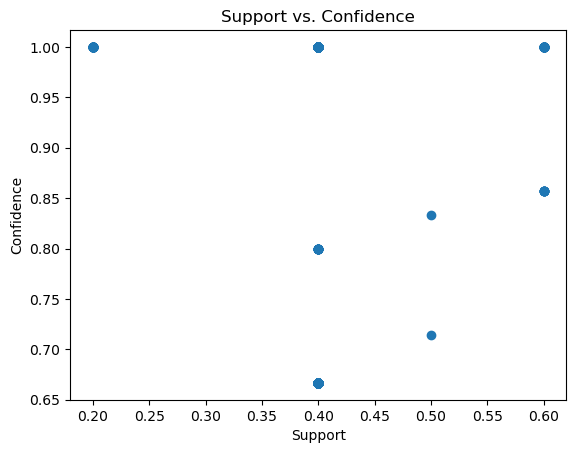

In [26]:
support_vs_confidence = plt.scatter(rules["support"], rules["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs. Confidence")
plt.show()


In [30]:
#t helps identify patterns or trends between the two measures, indicating the level of support required for a given confidence threshold.
#The rules are all over scaered and more than 50 percent of rules lie on and beyond the support range of 0.40


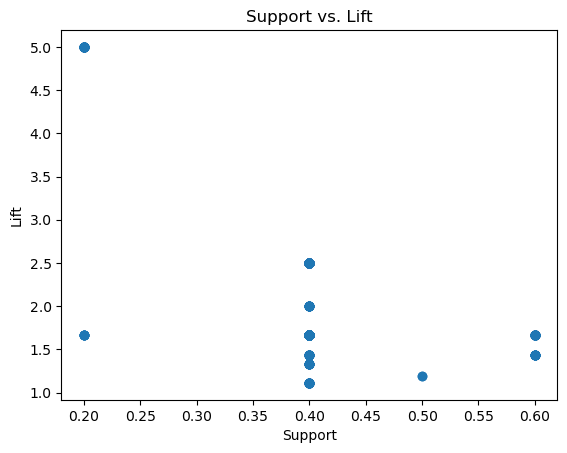

In [27]:
support_vs_lift = plt.scatter(rules["support"], rules["lift"])
plt.xlabel("Support")
plt.ylabel("Lift")
plt.title("Support vs. Lift")
plt.show()

In [31]:
#It helps understand the impact of support on the lift value, which measures the strength of the association between antecedents and consequents.
#Rules with high lift and support, indicating strong associations between items in the dataset.

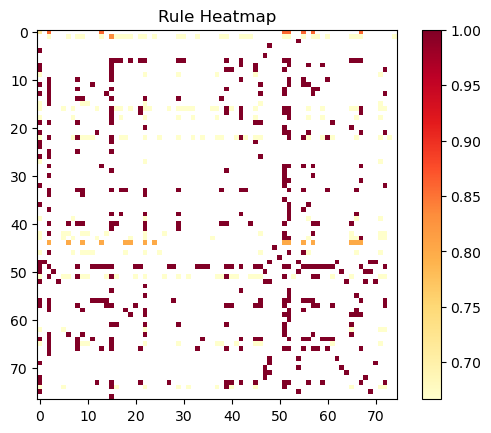

In [29]:
plt.imshow(rules.pivot(index='antecedents', columns='consequents', values='confidence'), cmap='YlOrRd', interpolation='None')
plt.colorbar()
plt.title("Rule Heatmap")
plt.show()

In [32]:
#We create a heatmap to visualize the support and confidence values for each combination of antecedents and consequents.